In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import re

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
used_cars_df = pd.read_csv("C:/Users/mvkri/OneDrive/Documents/Big Data UVA/Project/used_cars_data.csv", nrows=1000000)

C:\Users\mvkri\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
used_cars_df['torque'], used_cars_df['RPM'] = used_cars_df['torque'].str.split('@', 1).str

C:\Users\mvkri\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [1]:
used_cars_df.tail(10)

NameError: name 'used_cars_df' is not defined

In [6]:
## Format column values to remove string from the numerical columns

used_cars_df['back_legroom'] = used_cars_df['back_legroom'].str.replace(r'\D', '')
used_cars_df['front_legroom'] = used_cars_df['front_legroom'].str.replace(r'\D', '')
used_cars_df['fuel_tank_volume'] = used_cars_df['fuel_tank_volume'].str.replace(r'\D', '')
used_cars_df['height'] = used_cars_df['height'].str.replace(r'\D', '')
used_cars_df['length'] = used_cars_df['length'].str.replace(r'\D', '')
used_cars_df['maximum_seating'] = used_cars_df['maximum_seating'].str.replace(r'\D', '')
used_cars_df['wheelbase'] = used_cars_df['wheelbase'].str.replace(r'\D', '')
used_cars_df['width'] = used_cars_df['width'].str.replace(r'\D', '')
used_cars_df['torque'] = used_cars_df['torque'].str.replace(r'\D', '')
used_cars_df['RPM'] = used_cars_df['RPM'].str.replace(r'\D', '')

In [7]:
## Remove unwanted variables
variables_to_remove = ['wheel_system_display', 'trimId', 'trim_name', 
                       'sp_id','power', 'engine_type', 'description', 'listed_date', 'vin']
                        
used_cars_df.drop(variables_to_remove, axis = 1, inplace = True)

In [8]:
def format_transmission_display(display_value):
    if "Speed" in display_value:
        return display_value[:7]
    else:
        return ''

In [9]:
## Format transmission display to keep only first 7 characters as the automatic, manual part is in the transmission column
used_cars_df.transmission_display = used_cars_df.transmission_display.fillna('')
used_cars_df['transmission_display'] = used_cars_df['transmission_display'].apply(format_transmission_display)

In [10]:
used_cars_df_dummy = used_cars_df.copy()

In [11]:
def format_main_picture(url):
    #print(url)
    if pd.isnull(url):
        return False
    else:
        return True

In [14]:
## Format main_picture_url column to decide True or False for image availability
used_cars_df_dummy['main_picture_url'] = used_cars_df_dummy['main_picture_url'].apply(format_main_picture)

In [15]:
## Remove unwanted variables
variables_to_remove_1 = ['listing_id', 'longitude', 'latitude', 
                       'city', 'listing_color']
                        
used_cars_df_dummy.drop(variables_to_remove_1, axis = 1, inplace = True)

In [16]:
def format_major_options(options):
    if pd.isnull(options):
        return 0
    else:
        return options.count(',') + 1

In [17]:
## Format major_options to turn list to #elements
used_cars_df_dummy['major_options'] = used_cars_df_dummy['major_options'].apply(format_major_options)

In [18]:
def format_interior_colors(interior_color):
    if pd.isnull(interior_color):
        return ' '
    else:
        #regex = re.compile(".*?\((.*?)\)")
        return re.sub("[\(\[].*?[\)\]]", "", interior_color)

In [19]:
## Format remove () from interior colors
used_cars_df_dummy['interior_color'] = used_cars_df_dummy['interior_color'].apply(format_interior_colors)

In [20]:
def combined_fuel_economy(city_economy, highway_economy):
    return 1/((1/2) * ((1/city_economy) + (1/highway_economy)))

In [21]:
used_cars_df_dummy['combine_fuel_economy'] = combined_fuel_economy(used_cars_df_dummy['city_fuel_economy'] , used_cars_df_dummy['highway_fuel_economy'])

In [22]:
## Remove unwanted variables
variables_to_remove_2 = ['dealer_zip']
                        
used_cars_df_dummy.drop(variables_to_remove_2, axis = 1, inplace = True)

In [23]:
## Remove unwanted variables
variables_to_remove_3 = ['sp_name']
                        
used_cars_df_dummy.drop(variables_to_remove_3, axis = 1, inplace = True)

In [24]:
## Remove unwanted variables
variables_to_remove_4 = ['vehicle_damage_category','engine_displacement','city_fuel_economy', 'highway_fuel_economy']
                        
used_cars_df_dummy.drop(variables_to_remove_4, axis = 1, inplace = True)

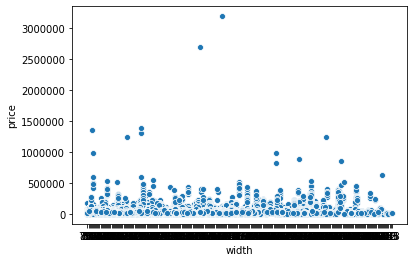

In [25]:
sns.scatterplot(x= 'width', y= 'price', data=used_cars_df_dummy)

In [26]:
# Remove price incorrect Ford card with value of >2000000
used_cars_df_dummy = used_cars_df_dummy.drop(230048) 

In [28]:
data_columns = ['back_legroom', 'bed', 'bed_height', 'combine_fuel_economy', 'daysonmarket'
                                       , 'front_legroom', 'fuel_tank_volume', 'height', 'horsepower'
                                       , 'length', 'mileage', 'price', 'seller_rating', 'torque', 'wheelbase', 'width', 'RPM']
used_cars_df_dummy_fmt = (used_cars_df_dummy.drop(data_columns, axis=1)
         .join(used_cars_df_dummy[data_columns].apply(pd.to_numeric, errors='coerce')))
used_cars_df_dummy = used_cars_df_dummy_fmt.copy()

In [32]:
#Replace Nan values by zeroes in numerical columns
used_cars_df_dummy['bed'] = used_cars_df_dummy['bed'].replace(np.nan, 0)
used_cars_df_dummy['bed_height'] = used_cars_df_dummy['bed_height'].replace(np.nan, 0)
used_cars_df_dummy['bed_length'] = used_cars_df_dummy['bed_length'].replace(np.nan, 0)
#used_cars_df_dummy['city_fuel_economy'] = used_cars_df_dummy['city_fuel_economy'].replace(np.nan, 0)
used_cars_df_dummy['combine_fuel_economy'] = used_cars_df_dummy['combine_fuel_economy'].replace(np.nan, 0)
used_cars_df_dummy['daysonmarket'] = used_cars_df_dummy['daysonmarket'].replace(np.nan, 0)
#used_cars_df_dummy['engine_displacement'] = used_cars_df_dummy['engine_displacement'].replace(np.nan, 0)
used_cars_df_dummy['front_legroom'] = used_cars_df_dummy['front_legroom'].replace(np.nan, 0)
used_cars_df_dummy['fuel_tank_volume'] = used_cars_df_dummy['fuel_tank_volume'].replace(np.nan, 0)
used_cars_df_dummy['height'] = used_cars_df_dummy['height'].replace(np.nan, 0)
#used_cars_df_dummy['highway_fuel_economy'] = used_cars_df_dummy['highway_fuel_economy'].replace(np.nan, 0)
used_cars_df_dummy['horsepower'] = used_cars_df_dummy['horsepower'].replace(np.nan, 0)
used_cars_df_dummy['length'] = used_cars_df_dummy['length'].replace(np.nan, 0)
used_cars_df_dummy['major_options'] = used_cars_df_dummy['major_options'].replace(np.nan, 0)
used_cars_df_dummy['maximum_seating'] = used_cars_df_dummy['maximum_seating'].replace(np.nan, 0)
used_cars_df_dummy['mileage'] = used_cars_df_dummy['mileage'].replace(np.nan, 0)
used_cars_df_dummy['owner_count'] = used_cars_df_dummy['owner_count'].replace(np.nan, 0)
used_cars_df_dummy['price'] = used_cars_df_dummy['price'].replace(np.nan, 0)
used_cars_df_dummy['savings_amount'] = used_cars_df_dummy['savings_amount'].replace(np.nan, 0)
used_cars_df_dummy['torque'] = used_cars_df_dummy['torque'].replace(np.nan, 0)
used_cars_df_dummy['wheelbase'] = used_cars_df_dummy['wheelbase'].replace(np.nan, 0)
used_cars_df_dummy['width'] = used_cars_df_dummy['width'].replace(np.nan, 0)
used_cars_df_dummy['year'] = used_cars_df_dummy['year'].replace(np.nan, 0)
used_cars_df_dummy['RPM'] = used_cars_df_dummy['RPM'].replace(np.nan, 0)
used_cars_df_dummy['seller_rating'] = used_cars_df_dummy['seller_rating'].replace(np.nan, 0)
used_cars_df_dummy['back_legroom'] = used_cars_df_dummy['back_legroom'].replace(np.nan, 0)

In [33]:
#Replace Nan values with spaces in alphanumeric columns
used_cars_df_dummy.body_type = used_cars_df_dummy.body_type.fillna('')
used_cars_df_dummy.cabin = used_cars_df_dummy.cabin.fillna('')
used_cars_df_dummy.engine_cylinders = used_cars_df_dummy.engine_cylinders.fillna('')
used_cars_df_dummy.exterior_color = used_cars_df_dummy.exterior_color.fillna('')
used_cars_df_dummy.fleet = used_cars_df_dummy.fleet.fillna('')
used_cars_df_dummy.frame_damaged = used_cars_df_dummy.frame_damaged.fillna('')
used_cars_df_dummy.franchise_dealer = used_cars_df_dummy.franchise_dealer.fillna('')
used_cars_df_dummy.franchise_make = used_cars_df_dummy.franchise_make.fillna('')
used_cars_df_dummy.fuel_type = used_cars_df_dummy.fuel_type.fillna('')
used_cars_df_dummy.has_accidents = used_cars_df_dummy.has_accidents.fillna('')
used_cars_df_dummy.isCab = used_cars_df_dummy.isCab.fillna('')
used_cars_df_dummy.is_certified = used_cars_df_dummy.is_certified.fillna('')
used_cars_df_dummy.is_cpo = used_cars_df_dummy.is_cpo.fillna('')
used_cars_df_dummy.is_new = used_cars_df_dummy.is_new.fillna('')
used_cars_df_dummy.is_oemcpo = used_cars_df_dummy.is_oemcpo.fillna('')
used_cars_df_dummy.main_picture_url = used_cars_df_dummy.main_picture_url.fillna('')
used_cars_df_dummy.make_name = used_cars_df_dummy.make_name.fillna('')
used_cars_df_dummy.model_name = used_cars_df_dummy.model_name.fillna('')
used_cars_df_dummy.salvage = used_cars_df_dummy.is_oemcpo.fillna('')
used_cars_df_dummy.theft_title = used_cars_df_dummy.theft_title.fillna('')
used_cars_df_dummy.transmission = used_cars_df_dummy.transmission.fillna('')
used_cars_df_dummy.transmission_display = used_cars_df_dummy.transmission_display.fillna('')
used_cars_df_dummy.wheel_system = used_cars_df_dummy.wheel_system.fillna('')

In [41]:
used_cars_df_dummy.tail()

,bed_length,body_type,cabin,engine_cylinders,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,fuel_type,has_accidents,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,main_picture_url,major_options,make_name,maximum_seating,model_name,owner_count,salvage,savings_amount,theft_title,transmission,transmission_display,wheel_system,year,back_legroom,bed,bed_height,combine_fuel_economy,daysonmarket,front_legroom,fuel_tank_volume,height,horsepower,length,mileage,price,seller_rating,torque,wheelbase,width,RPM
999995,0,SUV / Crossover,,V6,Pearl White Tricoat,,,True,Nissan,Gasoline,,White,,,,True,,True,6,Nissan,5,Murano,0.0,,0,,CVT,,AWD,2020,387.0,0.0,0.0,23.333333,70,405.0,19.0,678.0,260.0,1928.0,3.0,36267.0,4.500000,240.0,1112.0,754.0,4400.0
999996,0,Sedan,,I4,Silky Silver,False,False,False,,Gasoline,False,Gray,False,,,False,,True,5,Kia,5,Forte,1.0,,10,False,A,6-Speed,FWD,2017,359.0,0.0,0.0,28.448276,16,422.0,132.0,563.0,164.0,1795.0,5037.0,15746.0,4.211765,151.0,1063.0,701.0,4000.0
999997,0,SUV / Crossover,,I3,Deep Azure Metallic,,,True,Buick,Gasoline,,Brown,,,,True,,False,13,Buick,5,Encore GX,0.0,,0,,A,9-Speed,4WD,2020,36.0,0.0,0.0,27.418182,13,409.0,132.0,641.0,150.0,1714.0,2.0,32222.0,4.588235,174.0,1022.0,714.0,1500.0
999998,0,Sedan,,I4,Aspen White Tricoat,,,True,Nissan,Gasoline,,Black,,,,True,,True,1,Nissan,5,Sentra,0.0,,0,,CVT,,FWD,2020,374.0,0.0,0.0,33.264706,160,44.0,124.0,569.0,149.0,1827.0,7.0,20479.0,5.000000,146.0,1068.0,715.0,4400.0
999999,61 in,Pickup Truck,,I4,Black,False,False,True,Ford,Gasoline,False,None,False,,,True,,False,12,Ford,5,Ranger,0.0,,0,False,A,,4WD,2020,345.0,0.0,0.0,21.818182,252,431.0,18.0,718.0,270.0,2108.0,0.0,38705.0,4.000000,0.0,1268.0,858.0,0.0


In [44]:
used_cars_df['bed_height'].unique()

array([nan, '--'], dtype=object)

In [36]:
used_cars_numeric = used_cars_df_dummy[['back_legroom','daysonmarket'
                                       , 'front_legroom', 'fuel_tank_volume', 'height', 'horsepower'
                                       , 'length', 'mileage', 'price', 'seller_rating', 'torque', 'wheelbase', 'width', 'RPM', 'combine_fuel_economy']].copy()

In [ ]:
used_cars_numeric.head(1102)

In [ ]:
used_cars_numeric[used_cars_numeric['combine_fuel_economy'] > 0]

In [ ]:
used_cars_numeric.isnull().sum()

In [ ]:
## Determine VIF for all the columns to determine multi collinearity between the variables

X = used_cars_numeric.drop('price', axis=1)
## Remove unwanted variables
variables_to_remove_5 = ['engine_displacement','city_fuel_economy', 'highway_fuel_economy' ]
                        
X.drop(variables_to_remove_5, axis = 1, inplace = True)
vif_df = pd.DataFrame()
vif_df["variables"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

In [ ]:
vif_df